In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("insurance.csv")
df.sample(5)
df.info()
df.describe()
df.head(2)
x = df.iloc[:,[0,1,2,3,5,6]]
y = pd.DataFrame(df.iloc[:,4])
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
x.head(2)
sc = StandardScaler()
le = LabelEncoder()
ohe = OneHotEncoder()
x.iloc[:,[0,2,5]] = sc.fit_transform(pd.DataFrame(x.iloc[:,[0,2,5]]))
x.head(2)
dff=pd.DataFrame(ohe.fit_transform(x.iloc[:,[1,4]]).toarray())
x = x.join(dff)
x.head(2)
df.region.unique()
x.columns[[1,4]]
x.drop(x.columns[[1,4]],axis=1,inplace=True)
x.head(2)
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = "entropy",random_state=0)
model.fit(xtr,ytr)
ypred = model.predict(xte)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: Futur

[[311  10]
 [  4  77]]
0.9651741293532339


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9651741293532339

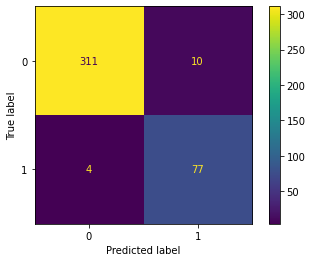

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yte,ypred)
print(cm)
from sklearn.metrics import accuracy_score
acs = accuracy_score(yte,ypred)
print(acs)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,xte,yte)
model.score(xte,yte)

In [5]:
from sklearn.metrics import classification_report

In [7]:
print(classification_report(yte,ypred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       321
           1       0.89      0.95      0.92        81

    accuracy                           0.97       402
   macro avg       0.94      0.96      0.95       402
weighted avg       0.97      0.97      0.97       402



In [8]:
from sklearn.metrics import roc_curve

In [10]:
fpr,tpr,thresh=roc_curve(yte,ypred)

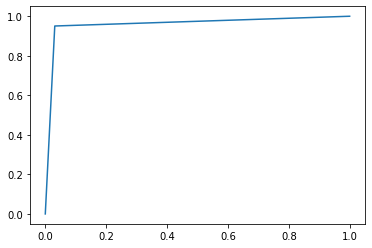

In [11]:
plt.plot(fpr,tpr)

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
roc_auc_score(yte,ypred)

0.9597323179877697